In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cirq
from tqdm import tqdm
from LST import *
import matplotlib
from scipy.optimize import curve_fit

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

9it [00:00, 363.01it/s]


TRACE


1it [00:00, 354.01it/s]


(2.000000014901161+3.1669695927679624e-16j)


6it [00:00, 91.94it/s]
5it [00:00, 346.63it/s]
6it [00:00, 196.41it/s]
6it [00:00, 330.56it/s]
7it [00:00, 320.69it/s]
7it [00:00, 142.46it/s]
7it [00:00, 407.69it/s]
6it [00:00, 288.16it/s]
5it [00:00, 397.52it/s]
7it [00:00, 484.23it/s]
6it [00:00, 327.40it/s]
9it [00:00, 199.07it/s]
7it [00:00, 178.30it/s]
9it [00:00, 325.80it/s]
9it [00:00, 413.60it/s]
9it [00:00, 265.68it/s]
9it [00:00, 583.72it/s]
9it [00:00, 134.30it/s]
8it [00:00, 168.85it/s]
9it [00:00, 255.42it/s]
9it [00:00, 447.10it/s]
9it [00:00, 201.69it/s]
9it [00:00, 97.71it/s]
9it [00:00, 279.92it/s]
9it [00:00, 160.81it/s]
9it [00:00, 234.59it/s]
8it [00:00, 234.86it/s]
9it [00:00, 124.93it/s]
9it [00:00, 390.85it/s]
9it [00:00, 167.35it/s]
9it [00:00, 338.52it/s]
9it [00:00, 211.52it/s]
9it [00:00, 239.29it/s]
9it [00:00, 372.87it/s]
9it [00:00, 152.51it/s]
9it [00:00, 396.81it/s]
9it [00:00, 423.15it/s]
9it [00:00, 164.60it/s]
9it [00:00, 154.81it/s]
9it [00:00, 96.17it/s]
9it [00:00, 375.25it/s]
9it [00:00, 522.28i

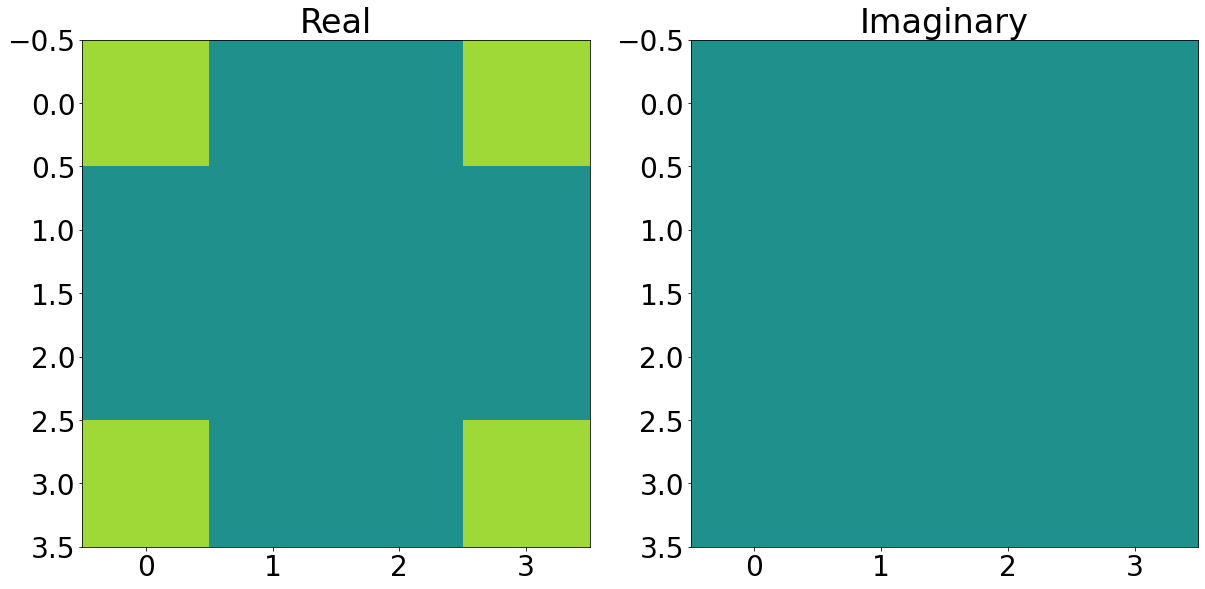

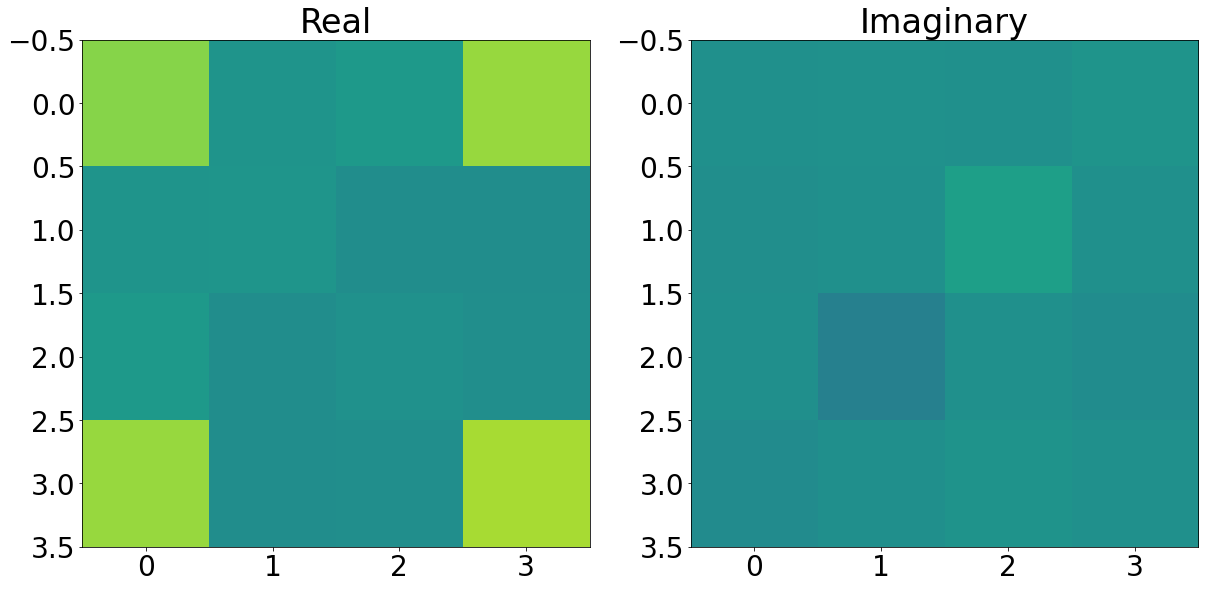

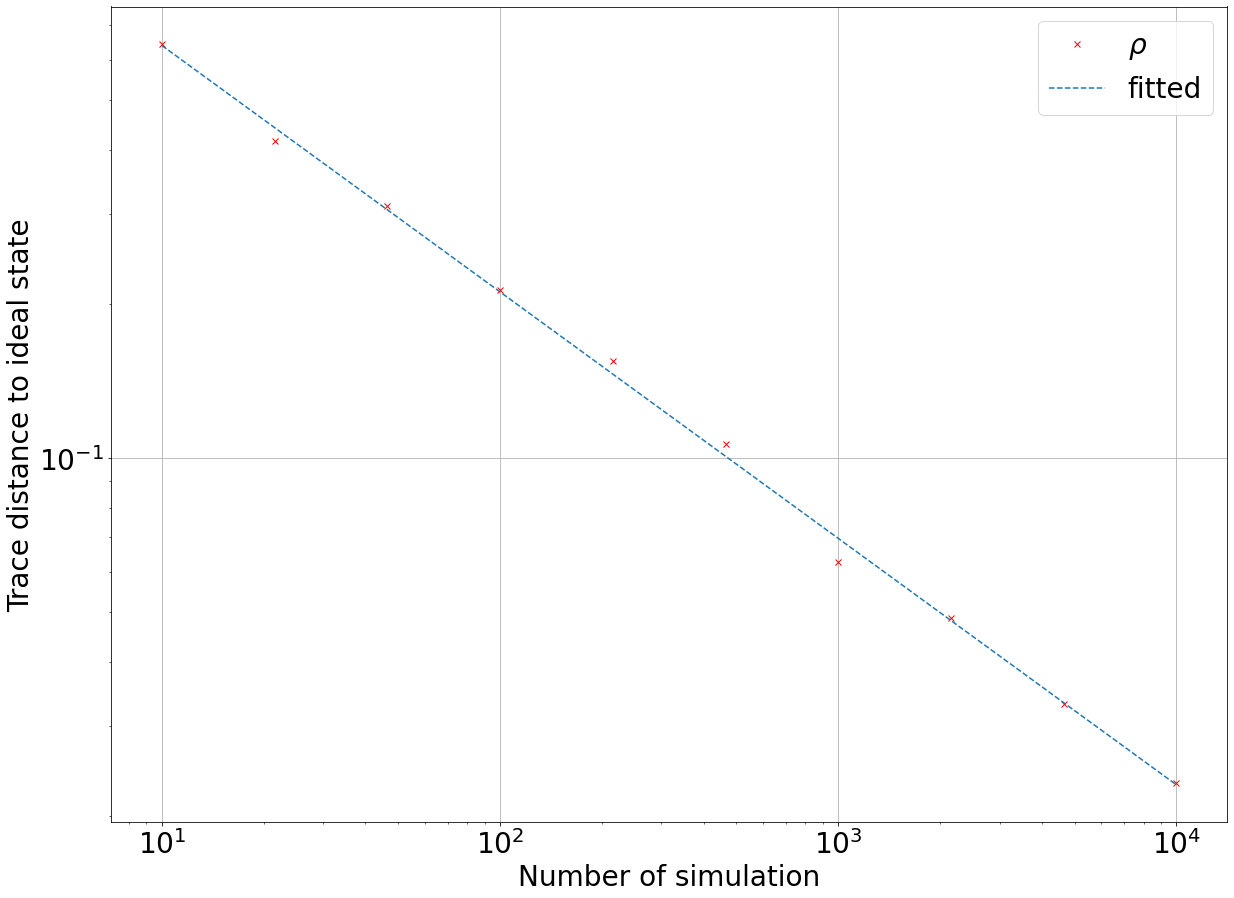

In [108]:
#noiseless experiement
N = 2
nsimu = 1000
proba = 0
circuit = base(N)
rho_shadow = find_rho(circuit,N,nsimu,probability = proba)


simulator = cirq.Simulator()
simulation = simulator.simulate(circuit)
final_state = np.array([simulation.final_state_vector])
rho_actual = final_state.T@final_state


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].set_title("Real")
axes[0].imshow(rho_actual.real,vmax=0.7,vmin=-0.7)

axes[1].set_title("Imaginary")
axes[1].imshow(rho_actual.imag,vmax=0.7,vmin=-0.7)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].set_title("Real")
axes[0].imshow(rho_shadow.real,vmax=0.7,vmin=-0.7)

axes[1].set_title("Imaginary")
axes[1].imshow(rho_shadow.imag,vmax=0.7,vmin=-0.7)

print("TRACE")
print(trace_dist(rho_actual,find_rho(circuit,N,1,proba)))

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 38}
matplotlib.rc('font', **font)


#Trace distance as a function of the number of simulation
nsimu_set = np.logspace(1,4,10)
n_ave = 10
distance = []
vardistance = []
for n in nsimu_set:
    dist = []
    for _ in range(n_ave):
        rho_shadow = find_rho(circuit,N,int(n),probability=proba)
        rho_shadow/=np.trace(rho_shadow)
        dist.append(trace_dist(rho_actual,rho_shadow))
    distance.append(np.mean(dist))
    vardistance.append(np.var(dist))


distance = np.array(distance)
vardistance = np.array(vardistance)


distance_log = np.log(distance)
nsimu_set_log = np.log(nsimu_set)

coef = np.polyfit(nsimu_set_log,distance_log,1)
poly1d_fn = np.poly1d(coef) 
print(coef)

plt.figure(figsize = (20,15))
plt.loglog(nsimu_set,distance,'rx',label= r'$T(\rho,\rho_s)$', markersize=20)
plt.loglog(nsimu_set, np.exp(poly1d_fn(nsimu_set_log)), '--', label="fitted: y = "+ "%.2f" % coef[0].real+"x + "+ "%.2f"%coef[1].real,linewidth=4)
plt.grid()
plt.legend()
plt.xlabel("Number of simulation")
plt.ylabel("Trace distance to ideal state")
plt.show()

